In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
flight_df = pd.read_excel(io="./data/flight_prediction_data/flight_price.xlsx")
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [87]:
# Print the shape of the dataframe
flight_df.shape

(10683, 11)

#### Get Basic info about the data

In [88]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 918.2+ KB


#### Let's verify if there is no null data in the dataset

In [89]:
flight_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### So, there is only one row which contains null data for Total_Stops. Let's have a look at the row

In [90]:
flight_df[flight_df["Total_Stops"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


#### We will take on how to handle this null value later in this Feature Engineering Notebook.

#### Let's have a look at the description of the dataset. The describe method will only consider the numerical columns for analyzing

In [91]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Let's have a look at which airlines costed the most and which one costed the minimal.

In [92]:
flight_df[flight_df["Price"]==flight_df["Price"].max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0


In [93]:
flight_df[flight_df["Price"]==flight_df["Price"].min()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759.0
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759.0
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759.0
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759.0


##### So, we can conclude from the above observations that the airline Jet Airways costed the max for Business class travel and the least cost was for SpiceJet

#### Let's try to handle Date_of_Journey. ML models do not understand the date format. We will try to separate it into Date, Month and Year

In [94]:
# Feature Engineering
flight_df["Date"] = flight_df["Date_of_Journey"].str.split("/").str[0]
flight_df["Month"] = flight_df["Date_of_Journey"].str.split("/").str[1]
flight_df["Year"] = flight_df["Date_of_Journey"].str.split("/").str[2]
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [95]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             10683 non-null  object 
 12  Month            10683 non-null  object 
 13  Year             10683 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.1+ MB


##### So, we can observe that the 3 new columns has a datatype of object. We would convert it to numerical type

In [96]:
flight_df["Date"] = flight_df["Date"].astype(int)
flight_df["Month"] = flight_df["Month"].astype(int)
flight_df["Year"] = flight_df["Year"].astype(int)
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             10683 non-null  int32  
 12  Month            10683 non-null  int32  
 13  Year             10683 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.0+ MB


##### All the 3 columns are now converted to numerical type. Now since we have the Date_of_Journey being separated, we no longer need this column and we will drop it

In [97]:
# Drop Date_of_Journey column
flight_df.drop(labels=["Date_of_Journey"], axis=1, inplace=True)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


#### Let's focus now on the Arrival_Time column. It is almost similar to Date_of_Journey. ML models also don't understand this time format. So, we need to split it into different columns for hours and minutes.

In [98]:
flight_df["Arrival_Hour"] = flight_df["Arrival_Time"].str.split(":").str[0]
flight_df["Arrival_Min"] = flight_df["Arrival_Time"].str.split(":").str[1].str.split(" ").str[0]
flight_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,04,25


In [99]:
flight_df["Arrival_Hour"] = flight_df["Arrival_Hour"].astype(int)
flight_df["Arrival_Min"] = flight_df["Arrival_Min"].astype(int)
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Arrival_Time     10683 non-null  object 
 6   Duration         10683 non-null  object 
 7   Total_Stops      10682 non-null  object 
 8   Additional_Info  10683 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             10683 non-null  int32  
 11  Month            10683 non-null  int32  
 12  Year             10683 non-null  int32  
 13  Arrival_Hour     10683 non-null  int32  
 14  Arrival_Min      10683 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.0+ MB


In [100]:
flight_df.drop(labels=["Arrival_Time"], axis=1, inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


##### So, we have also cleaned the Arrival_Time for the dataset.

#### Let's handle Departure_Time in the similar fashion

In [101]:
flight_df["Dept_Hour"] = flight_df["Dep_Time"].str.split(":").str[0]
flight_df["Dept_Min"] = flight_df["Dep_Time"].str.split(":").str[1]
flight_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25


In [102]:
flight_df["Dept_Hour"] = flight_df["Dept_Hour"].astype(int)
flight_df["Dept_Min"] = flight_df["Dept_Min"].astype(int)

In [103]:
flight_df.drop(labels=["Dep_Time"], axis=1, inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


#### Let's convert the Duration to total minutes in order to have one numerical feature only instead of an object

In [104]:
def duration_to_minutes(t):
    time = str(t).split(" ")
    hours = int(str(time[0]).rstrip(time[0][-1]))
    minutes = 0
    if (len(time) > 1):
        minutes = int(str(time[1]).rstrip(time[1][-1]))
    total_mins = hours * 60 + minutes
    return total_mins

In [105]:
flight_df["Duration"] = flight_df["Duration"].apply(lambda t : duration_to_minutes(t))

In [107]:
flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302.0,1,3,2019,21,35,16,50


##### So, Duration is converted to a numerical feature

#### Now let's focus on a categorical variable Total_Stops and perform Feature Engineering over this variable.

In [111]:
flight_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

#### We will perform an Ordinal Labelling on this column. The reason for this because, this column actually has an order like no stops or multiple stops. Additionally, if the number of stops are more, there will be an increment in fare. We can prove that using EDA.

In [114]:
stops_map = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, np.nan:1}
flight_df["Total_Stops"] = flight_df["Total_Stops"].map(stops_map)
flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302.0,1,3,2019,21,35,16,50


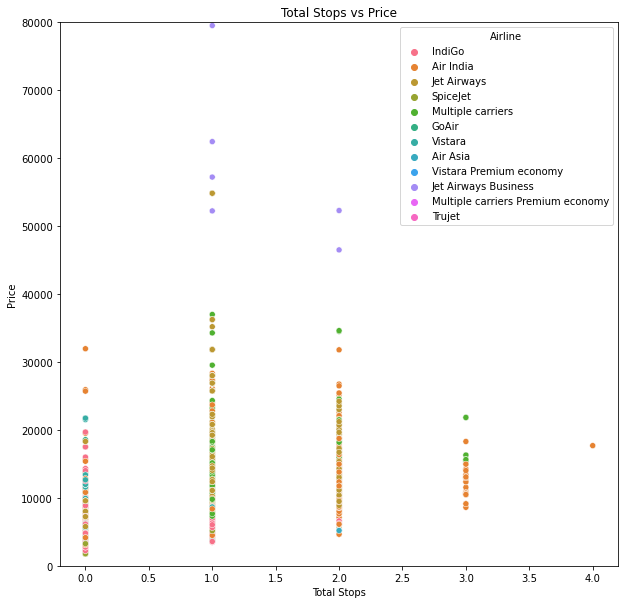

In [147]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=flight_df, x="Total_Stops", y="Price", hue="Airline")
plt.ylim((0, 80000))
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Total Stops vs Price")
plt.show()

In [120]:
flight_df[flight_df["Price"] == 79512.0]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,340,1,Business class,79512.0,1,3,2019,11,25,5,45


##### So, we observe that the flights have the most fares when the stops is 1 and not the more than one. The flight price of that row where Total_Stops is null is 7480.0. We also obeserve that the fflight with 0 stop has the minimum value and it increases subsequently with the increase in number of stops.

#### If we take a look at the Route column, then it is somewhat similar to the combination of Source and Destination columns. So, we can drop of the route column.

In [148]:
flight_df.drop(labels=["Route"], axis=1, inplace=True)

#### Let's perform OneHotEncoding on all the rest of the categorical columns - Additional Info, Airline, Source and Destination columns. The reason being One Hot Encoding is suitable because we don't want to create an order between the values of these variables which will not be meaningful.

In [153]:
flight_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662.0,1,5,2019,13,15,5,50


In [151]:
flight_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [158]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
cat_cols = ["Airline", "Source", "Destination", "Additional_Info"]
encoder.fit(flight_df[cat_cols])
new_df = pd.DataFrame(encoder.transform(flight_df[cat_cols]).toarray(), columns=encoder.get_feature_names_out())

#### Let's prepare the final Dataframe for Machine Learning model

In [160]:
flight_df.drop(labels=cat_cols, axis=1, inplace=True)
final_flight_df = pd.concat(objs=[flight_df, new_df], axis=1)
final_flight_df

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,0,3897.0,24,3,2019,1,10,22,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,445,2,7662.0,1,5,2019,13,15,5,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1140,2,13882.0,9,6,2019,4,25,9,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,325,1,6218.0,12,5,2019,23,30,18,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,285,1,13302.0,1,3,2019,21,35,16,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,4107.0,9,4,2019,22,25,19,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,155,0,4145.0,27,4,2019,23,20,20,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,180,0,7229.0,27,4,2019,11,20,8,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,160,0,12648.0,1,3,2019,14,10,11,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [162]:
final_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Duration                                      10683 non-null  int64  
 1   Total_Stops                                   10683 non-null  int64  
 2   Price                                         10683 non-null  float64
 3   Date                                          10683 non-null  int32  
 4   Month                                         10683 non-null  int32  
 5   Year                                          10683 non-null  int32  
 6   Arrival_Hour                                  10683 non-null  int32  
 7   Arrival_Min                                   10683 non-null  int32  
 8   Dept_Hour                                     10683 non-null  int32  
 9   Dept_Min                                      10683 non-null 

##### So, now our Feature Engineering is complete and we can use this data for our ML model training purpose.